In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./Iris.data", header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

LabelEncoder는 카테고리형 데이터를 숫자로 변환해주는 역할

In [4]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

label=LabelEncoder()

df['class']=label.fit_transform(df['class'])

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0.5, 1.0, 'Label')

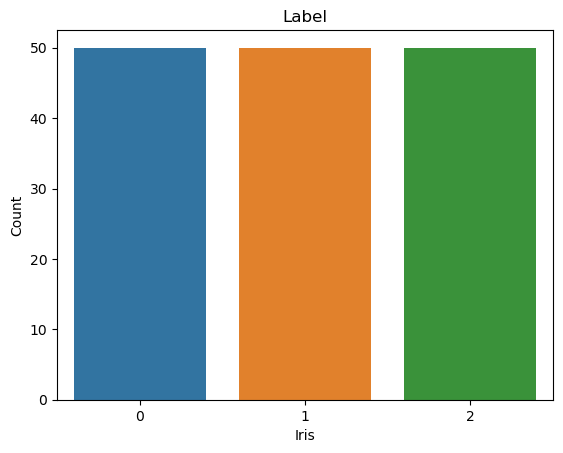

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Iris")
plt.ylabel("Count")
plt.title("Label")

In [4]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
# 결측치 확인
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
X=df.drop('class', axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함.

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y=df['class']
y.value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### One-hot encoding
One-hot encoding의 장점은 다음과 같다.

1. 독립적인 표현: 각 범주는 다른 범주와 독립적으로 표현되므로 범주 간의 상대적인 크기와 순서를 부여하지 않는다.
2. 비선형 관계 표현: 범주 간의 관계를 비선형적으로 표현할 수 있다. 즉, 각 범주가 서로 독립적이고 관련성이 없다고 가정할 수 있다.
3. 모델의 해석 용이성: 범주형 변수를 이진 형태로 변환하면 모델이 이해하기 쉽고 해석하기 쉬운 형태로 입력된다.입력됩니다.

In [9]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,sepal length,sepal width,petal length,petal width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [11]:
X_train.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [12]:
y_train

array([[False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [Fa

In [15]:
#X_train의 특성 개수
X_train.shape[1]

4

Sequential(): Sequential 모델을 생성합니다. Sequential 모델은 레이어를 선형으로 쌓은 신경망 구조를 만들 때 사용됩니다.

Tanh 함수는 입력을 -1과 1 사이의 값으로 변환합니다.

Softmax 함수는 다중 클래스 분류에서 사용되며, 출력을 확률 분포로 변환합니다

Sigmoid 함수는 이진 분류에서 사용되며, 출력을 0과 1 사이의 값으로 변환합니다.

In [18]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='tanh'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))
#model.add(Dense(3, activation='sigmoid'))


model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                50        
                                                                 
 dense_15 (Dense)            (None, 8)                 88        
                                                                 
 dense_16 (Dense)            (None, 6)                 54        
                                                                 
 dense_17 (Dense)            (None, 3)                 21        
                                                                 
Total params: 213 (852.00 Byte)
Trainable params: 213 (852.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


model.fit(): 모델을 주어진 훈련 데이터로 학습시키는 메서드입니다.

x=X_train: 입력 데이터로 사용할 훈련 데이터 (X_train)를 지정합니다.

y=y_train: 출력 데이터(타깃)로 사용할 훈련 데이터의 레이블 (y_train)를 지정합니다.

epochs=30: 전체 훈련 데이터셋을 몇 번 반복하여 학습할지를 나타내는 에포크(epoch) 수를 지정합니다.

batch_size=32: 한 번의 에포크에서 사용할 배치(batch) 크기를 지정합니다. 배치는 모델이 한 번에 처리하는 데이터 샘플의 수를 나타냅니다.

validation_data=(X_test, y_test): 검증 데이터셋으로 사용할 데이터 (X_test, y_test)를 지정합니다. 각 에포크가 끝날 때마다 검증 데이터셋을 사용하여 모델의 성능을 평가합니다.

model.fit() 메서드는 학습된 모델의 히스토리를 model_history 변수에 저장합니다. 이 히스토리에는 각 에포크별로 손실 함수 값과 지정된 평가 지표(예: 정확도) 등의 정보가 포함됩니다.

In [21]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


4/4 [==============================] - 3s 126ms/step - loss: 1.1172 - accuracy: 0.2857 - val_loss: 0.9409 - val_accuracy: 0.5789
Epoch 2/30
4/4 [==============================] - 0s 18ms/step - loss: 0.7400 - accuracy: 0.6964 - val_loss: 0.6621 - val_accuracy: 0.5789
Epoch 3/30
4/4 [==============================] - 0s 16ms/step - loss: 0.5451 - accuracy: 0.7143 - val_loss: 0.4697 - val_accuracy: 0.8684
Epoch 4/30
4/4 [==============================] - 0s 17ms/step - loss: 0.4620 - accuracy: 0.8393 - val_loss: 0.3964 - val_accuracy: 0.8947
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 0.3682 - accuracy: 0.9018 - val_loss: 0.5334 - val_accuracy: 0.6316
Epoch 6/30
4/4 [==============================] - 0s 16ms/step - loss: 0.3714 - accuracy: 0.8304 - val_loss: 0.2604 - val_accuracy: 0.9737
Epoch 7/30
4/4 [==============================] - 0s 17ms/step - loss: 0.2690 - accuracy: 0.8929 - val_loss: 0.2955 - val_accuracy: 0.8684
Epoch 8/30
4/4 [========

In [22]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1], dtype=int64)

In [23]:
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

In [33]:
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [25]:
#실제 정답 값 = label
y_test

array([[False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [Fa

In [27]:
# 예측에 대한 확률 분포
y_pred

array([[1.9606930e-05, 8.4986230e-03, 9.9148178e-01],
       [2.8744568e-03, 9.9135804e-01, 5.7675107e-03],
       [9.9694163e-01, 3.0241844e-03, 3.4093573e-05],
       [2.1092517e-05, 8.8081118e-03, 9.9117076e-01],
       [9.9680436e-01, 3.1602031e-03, 3.5412970e-05],
       [1.8535949e-05, 8.2012899e-03, 9.9178010e-01],
       [9.9687576e-01, 3.0895688e-03, 3.4727793e-05],
       [2.7814130e-03, 9.9035639e-01, 6.8622320e-03],
       [2.7371431e-03, 9.8785895e-01, 9.4039384e-03],
       [3.1350146e-03, 9.9156243e-01, 5.3026271e-03],
       [2.4247427e-05, 9.9383788e-03, 9.9003744e-01],
       [2.8556632e-03, 9.9114650e-01, 5.9978669e-03],
       [2.7125224e-03, 9.8578984e-01, 1.1497639e-02],
       [2.7071345e-03, 9.8711872e-01, 1.0174194e-02],
       [2.5946945e-03, 9.7672689e-01, 2.0678457e-02],
       [9.9667311e-01, 3.2902192e-03, 3.6672336e-05],
       [2.6423517e-03, 9.8364300e-01, 1.3714570e-02],
       [2.6141468e-03, 9.7717208e-01, 2.0213824e-02],
       [9.9665833e-01, 3.304

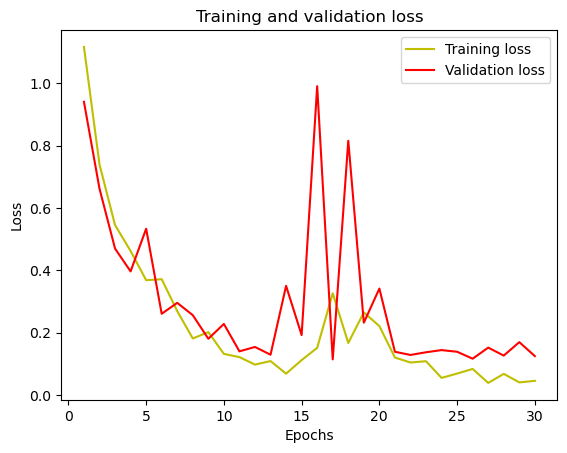

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력


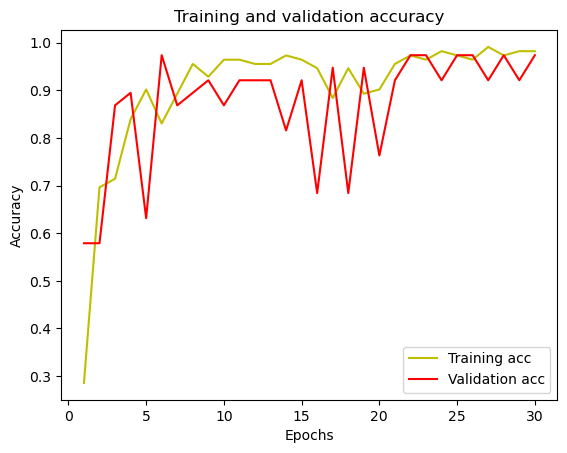

In [29]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix (혼동행렬)

#### 정확도 (Accuracy) : 전체 샘플 중 올바르게 예측한 샘플의 비율

Accuracy = TP + FN / TP + TN + FP + FN

#### 정밀도 (Precision) :  Positive로 예측한 샘플 중 실제 Positive인 샘플의 비율

Precision = TP / TP + FP

#### 재현율 (Recall or Sensitivity) : 실제 Positive인 샘플 중 Positive로 올바르게 예측한 샘플의 비율

Recall = TP / TP + FN

#### F1-score: 정밀도와 재현율의 조화 평균으로, 모델의 종합적인 성능을 평가하는 지표

F1-score = 2 x (Precision x Recall / Precision + Recall)ecision
+
Recall
F1-score=2× 
Precision+Recall
Precision×Recall
​


In [30]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
